In [1]:
import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from typing import Tuple

pd.set_option("display.max_column", None)
h2o.no_progress()


In [2]:
project_root = Path().cwd().parent.parent.parent.parent
project_root

WindowsPath('d:/brvehinsmarek')

In [3]:
data_dir = project_root / "data"
data_dir

WindowsPath('d:/brvehinsmarek/data')

In [4]:
output_dir = project_root / "output"
output_dir

WindowsPath('d:/brvehinsmarek/output')

In [5]:
h2o.init(max_mem_size="16G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu23.32+11-CA (build 23.0.2+7, mixed mode, sharing)
  Starting server from D:\conda\envs\brvehins_separate_env\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\S-A118~1\AppData\Local\Temp\tmpps61w5tt
  JVM stdout: C:\Users\S-A118~1\AppData\Local\Temp\tmpps61w5tt\h2o_s_A118_05_started_from_python.out
  JVM stderr: C:\Users\S-A118~1\AppData\Local\Temp\tmpps61w5tt\h2o_s_A118_05_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Europe/Warsaw
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,7 months and 3 days
H2O_cluster_name:,H2O_from_python_s_A118_05_xjm8eh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.98 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [6]:
coverage = "PartColl" #manual input
model = "sev" # manual inut - one of "freq", "sev", "pp"

exposure = "ExposTotal"
model_numerator = f"ClaimNb{coverage}" if model == "freq" else f"ClaimAmount{coverage}"
model_denominator = f"ClaimNb{coverage}" if model == "sev" else exposure
model_fraction = f"{model.capitalize()}{coverage}" if model != "pp" else f"{model.upper()}{coverage}"
response = model_numerator if model == "freq" else model_fraction # Classical setup for GLMs. May be differennt for other ML models

print(f"Coverage: {coverage}")
print(f"Model: {model}")
print(f"Model numerator: {model_numerator}")
print(f"Model denominator: {model_denominator}")
print(f"Model fraction: {model_fraction}")
print(f"Response: {response}")

output_plots_dir = output_dir / coverage / model / "plots"
output_plots_dir.mkdir(parents=True, exist_ok=True)
output_tables_dir = output_dir / coverage / model / "tables"
output_tables_dir.mkdir(parents=True, exist_ok=True)

Coverage: PartColl
Model: sev
Model numerator: ClaimAmountPartColl
Model denominator: ClaimNbPartColl
Model fraction: SevPartColl
Response: SevPartColl


In [7]:
preprocessed_file_name = data_dir / coverage/ model/ f"brvehins1_{coverage}_{model}_preprocessed.csv"
preprocessed_file_name

WindowsPath('d:/brvehinsmarek/data/PartColl/sev/brvehins1_PartColl_sev_preprocessed.csv')

In [8]:
df = h2o.import_file(str(preprocessed_file_name))

In [9]:
print(f"Input data shape: {df.dim}")

Input data shape: [187815, 38]


In [10]:
df.describe()

Rows:187815
Cols:38

,Gender,DrivAge,VehYear,VehModel,VehGroup,Area,State,StateAb,ExposTotal,PremTotal,SumInsAvg,ClaimNbRob,ClaimNbPartColl,ClaimNbTotColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther,FreqRob,SevRob,PPRob,FreqPartColl,SevPartColl,PPPartColl,FreqTotColl,SevTotColl,PPTotColl,FreqFire,SevFire,PPFire,FreqOther,SevOther,PPOther,Fold,log(ExposTotal)
type,enum,enum,int,enum,enum,enum,enum,enum,real,real,real,int,int,int,int,int,int,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real
mins,,,1970.0,,,,,,0.0027397261001169703,0.00867888145148754,7.08,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0023530519083250975,1.0,0.02795638803466591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-5.899897327039798
mean,,,2006.9904267497266,,,,,,17.79210827253134,17774.7368111635,35344.019350797345,0.17241434390224417,2.1100125123126445,0.08890131246173096,0.0037590181827862525,3.375640923248942,4136.42705854165,7553.04594947156,2772.405143359156,66.21365705614568,845.5824721135167,0.06768286645810667,2504.7427493058617,1895.0381971922923,1.2026736133798843,3999.3246531272644,5447.678039726338,0.05448851374885889,2304.2914766481317,1857.793113301306,0.0013434533170997949,63.11115858690733,41.42074498711959,0.47916783622781395,210.4173730586401,445.3397067559097,3.596155791603441,1.7586508600884272
maxs,,,2011.0,,,,,,8078.440000000001,6478755.129999999,904788.02,164.0,1617.0,66.0,6.0,1278.0,4421765.0,2289213.0,2201873.0,210436.0,967914.0,729.999980623834,347611.0,13577269.639622685,5474.999854678754,622483.0,24583114.34749792,729.999980623834,347645.0,27480849.27058422,25.0,201149.0,1475500.0,6934.999815926422,228717.0,3903300.0,6.0,8.996954063567932
sigma,,,3.47925643132523,,,,,,44.73851022290521,45213.94045398594,22869.538107064625,0.8997678808598801,7.681954965690379,0.4022986995972383,0.0658072468847332,15.531251274022868,24961.51287040023,18109.225207751206,15253.528820249334,1702.588400812393,6441.028225412758,3.359805578506595,9861.787056888907,75507.50919382717,19.292246058601016,7235.864831271304,97552.3409168677,3.277432175905938,9833.639105240114,88778.42718161625,0.1103771619634718,1594.894719748211,5131.123880908063,18.306499779312766,2070.096693485994,18058.25633729268,1.7458646589036984,1.581200844926045
zeros,,,0,,,,,,0,0,0,168572,0,173904,187149,120628,168572,0,173904,187149,120628,168572,168572,168572,0,0,0,173904,173904,173904,187149,187149,187149,120628,120628,120628,0,1703
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Male,36-45,2009.0,Volvo - Fh 440 6x2 2p (diesel),Volvo Caminhoes - Todos,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,4.55,53031.35,301889.74,0.0,1.0,0.0,0.0,0.0,0.0,648.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21978021978021972,648.0,142.41758241758245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.515127232962859
1,Male,26-35,1998.0,Vw - Volkswagen - Gol Gl 1.6 Mi/star 1.6 E 1.8/atlanta 1.6,Vw Volkswagen Gol Acima De 1.0,Met. Porto Alegre e Caxias do Sul,Rio Grande do Sul,RS,1.0,660.59,13574.0,0.0,1.0,0.0,0.0,2.0,0.0,2773.0,0.0,0.0,120.0,0.0,0.0,0.0,1.0,2773.0,2773.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,60.0,120.0,3.0,0.0
2,Male,26-35,2010.0,Vw - Volkswagen - Gol City (trend) 1.0 Mi Total Flex 8v 4p,Vw Volkswagen Gol 1.0,Maranhao,Maranhao,MA,10.42,12908.31,26540.060000000005,0.0,1.0,0.0,0.0,2.0,0.0,1512.0,0.0,0.0,320.0,0.0,0.0,0.0,0.09596928982725528,1512.0,145.10556621880997,0.0,0.0,0.0,0.0,0.0,0.0,0.19193857965451055,160.0,30.71017274472169,2.0,2.343727036325221


In [11]:
df.types

{'Gender': 'enum',
 'DrivAge': 'enum',
 'VehYear': 'int',
 'VehModel': 'enum',
 'VehGroup': 'enum',
 'Area': 'enum',
 'State': 'enum',
 'StateAb': 'enum',
 'ExposTotal': 'real',
 'PremTotal': 'real',
 'SumInsAvg': 'real',
 'ClaimNbRob': 'int',
 'ClaimNbPartColl': 'int',
 'ClaimNbTotColl': 'int',
 'ClaimNbFire': 'int',
 'ClaimNbOther': 'int',
 'ClaimAmountRob': 'int',
 'ClaimAmountPartColl': 'int',
 'ClaimAmountTotColl': 'int',
 'ClaimAmountFire': 'int',
 'ClaimAmountOther': 'int',
 'FreqRob': 'real',
 'SevRob': 'real',
 'PPRob': 'real',
 'FreqPartColl': 'real',
 'SevPartColl': 'real',
 'PPPartColl': 'real',
 'FreqTotColl': 'real',
 'SevTotColl': 'real',
 'PPTotColl': 'real',
 'FreqFire': 'real',
 'SevFire': 'real',
 'PPFire': 'real',
 'FreqOther': 'real',
 'SevOther': 'real',
 'PPOther': 'real',
 'Fold': 'int',
 'log(ExposTotal)': 'real'}

In [12]:
cat_cols = [
    "Gender",
    "DrivAge",
    "Area",
    "StateAb"
]

In [13]:
for col in cat_cols[:1]:
    grouped_df = df.group_by(col).sum(model_numerator).sum(model_denominator).get_frame()
    grouped_df[model_fraction] = grouped_df[f"sum_{model_numerator}"] / grouped_df[f"sum_{model_denominator}"]
    display(grouped_df)


Gender,sum_ClaimAmountPartColl,sum_ClaimNbPartColl,SevPartColl
Female,5.14167e+08,160017,3213.21
Male,7.45643e+08,192271,3878.08
No information,1.58765e+08,44004,3607.97


In [14]:
#for col in cat_cols:
 #   grouped_df = df.group_by(col).sum(model_numerator).sum(model_denominator).get_frame()
  #  grouped_df[model_fraction] = grouped_df[f"sum_{model_numerator}"] / grouped_df[f"sum_{model_denominator}"]
    # display(grouped_df)

    # Convert Frame to Pandas DataFrame
   # grouped_pdf = grouped_df.as_data_frame()
    #grouped_pdf[col] = grouped_pdf[col].fillna(value = "No information")
#    display(grouped_pdf)

    # Make a plot
 #   fig, ax = plt.subplots()
  #  ax.bar(
   #     x = col,
    #    height=f"sum_{model_denominator}",
 #       data = grouped_pdf,
  #      color = "grey"
#    )
 #   ax.set_xlabel(col)
 #   ax.set_ylabel(f"sum_{model_denominator}")
 #   ax.set_xticklabels(grouped_pdf[col], rotation = 90)

  #  ax2 = ax.twinx()
  #  ax2.plot(
  #      col,
  #      model_fraction,
#        data = grouped_pdf,
#        color = "brown"
#    )
#    ax2.set_ylabel(model_fraction)
#    plt.title(f"Summary plot for {col} variable")
#    plt.show() 

In [15]:
def model_fraction_by_variable_summary_cat(
        ax: plt.Axes,
        dataframe: h2o.H2OFrame,
        col: str,
        model_numerator: str,
        model_denominator: str,
        model_fraction: str,
        bar_color: str = "steelblue",
        line_color: str = "darkgreen",
        ylim_max_denominator: float = None,
        ylim_max_model_fraction: float = None
) -> Tuple[plt.Axes, plt.Axes, pd.DataFrame]:
    """
    Plot model_fraction and denominator sums for a categorical variable.
    
    Return ax (line), ax2 (bar), and the prouped Pandas DataFrame.
    """
    # Select required columns
    data = dataframe[[col, model_numerator, model_denominator]]

    # Group data and compute model_fraction
    grouped_df = data.group_by(col).sum(model_numerator).sum(model_denominator).get_frame()
    grouped_df[model_fraction] = grouped_df[f"sum_{model_numerator}"] / grouped_df[f"sum_{model_denominator}"]

    grouped_pdf = grouped_df.as_data_frame(use_multi_thread=True)

    ax.plot(
        grouped_pdf[col],
        grouped_pdf[model_fraction],
        color=line_color,
        marker="o",
        label=model_fraction,
        zorder=0
    )
    ax.set_xlabel(col)
    ax.set_ylabel(model_fraction, color=line_color)
    ax.tick_params(axis='y', labelcolor=line_color)
    ax.set_xticks(grouped_pdf[col])
    ax.set_xticklabels(grouped_pdf[col], rotation=90)
    if ylim_max_model_fraction is not None:
        ax.set_ylim(0, ylim_max_model_fraction)
    
    ax2 = ax.twinx()
    ax2.bar(
        x = grouped_pdf[col],
        height=grouped_pdf[f"sum_{model_denominator}"],
        color=bar_color,
        label=f"sum_{model_denominator}",
        alpha=0.7,
        zorder=1
        #edgecolor="black"
    )
    ax2.set_ylabel(f"sum_{model_denominator}", color=bar_color)
    ax2.tick_params(axis='y', labelcolor=bar_color)
    if ylim_max_denominator is not None:
        ax2.set_ylim(0, ylim_max_denominator)
    
    ax.set_title(f"{model_fraction} by {col}")
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

    return ax, ax2, grouped_pdf

In [22]:
model_fraction_max_dict = {}
for col in cat_cols:
    grouped_df = df.group_by(col).sum(model_numerator).sum(model_denominator).get_frame()
    grouped_df[model_fraction] = grouped_df[f"sum_{model_numerator}"] / grouped_df[f"sum_{model_denominator}"]
    model_fraction_max_dict[col] = grouped_df[model_fraction].max()
model_fraction_global_max = round(max(model_fraction_max_dict.values()),0)

print(f"Model franction maximum by variable: {model_fraction_max_dict}")
print(f"Model fraction global max: {model_fraction_global_max}")



Model franction maximum by variable: {'Gender': 3878.0821132672113, 'DrivAge': 3736.5326368130604, 'Area': 4723.903557022369, 'StateAb': 4347.1442307692305}
Model fraction global max: 4724.0


Gender Grouped DataFrame: 


,Gender,sum_ClaimAmountPartColl,sum_ClaimNbPartColl,SevPartColl
0,Female,514167438,160017,3213.205084
1,Male,745642726,192271,3878.082113
2,No information,158765161,44004,3607.971116


DrivAge Grouped DataFrame: 


,DrivAge,sum_ClaimAmountPartColl,sum_ClaimNbPartColl,SevPartColl
0,18-25,63416422,18177,3488.827749
1,26-35,250827887,71446,3510.733799
2,36-45,463755479,129498,3581.178698
3,46-55,260002887,69584,3736.532637
4,>55,225609551,63872,3532.213662
5,No information,154963099,43715,3544.849571


Area Grouped DataFrame: 


,Area,sum_ClaimAmountPartColl,sum_ClaimNbPartColl,SevPartColl
0,Acre,1798823,477,3771.117400
1,Alagoas,9513317,2792,3407.348496
2,Amapa,1356309,312,4347.144231
3,Amazonas,6905711,1926,3585.519730
4,Bahia,45469815,12220,3720.934124
5,Blumenau e demais regioes,40439003,10120,3995.948913
6,Brasilia,50798272,15180,3346.394730
7,Ceara,23920882,7644,3129.367085
8,Demais regioes,91131037,23041,3955.168482
9,Espirito Santo,27014791,6680,4044.130389


StateAb Grouped DataFrame: 


,StateAb,sum_ClaimAmountPartColl,sum_ClaimNbPartColl,SevPartColl
0,AC,1798823,477,3771.117400
1,AL,9513317,2792,3407.348496
2,AM,6905711,1926,3585.519730
3,AP,1356309,312,4347.144231
4,BA,45469815,12220,3720.934124
5,CE,23920882,7644,3129.367085
6,DF,50798272,15180,3346.394730
7,ES,27014791,6680,4044.130389
8,GO,56523318,15636,3614.947429
9,MA,9945773,2668,3727.800975


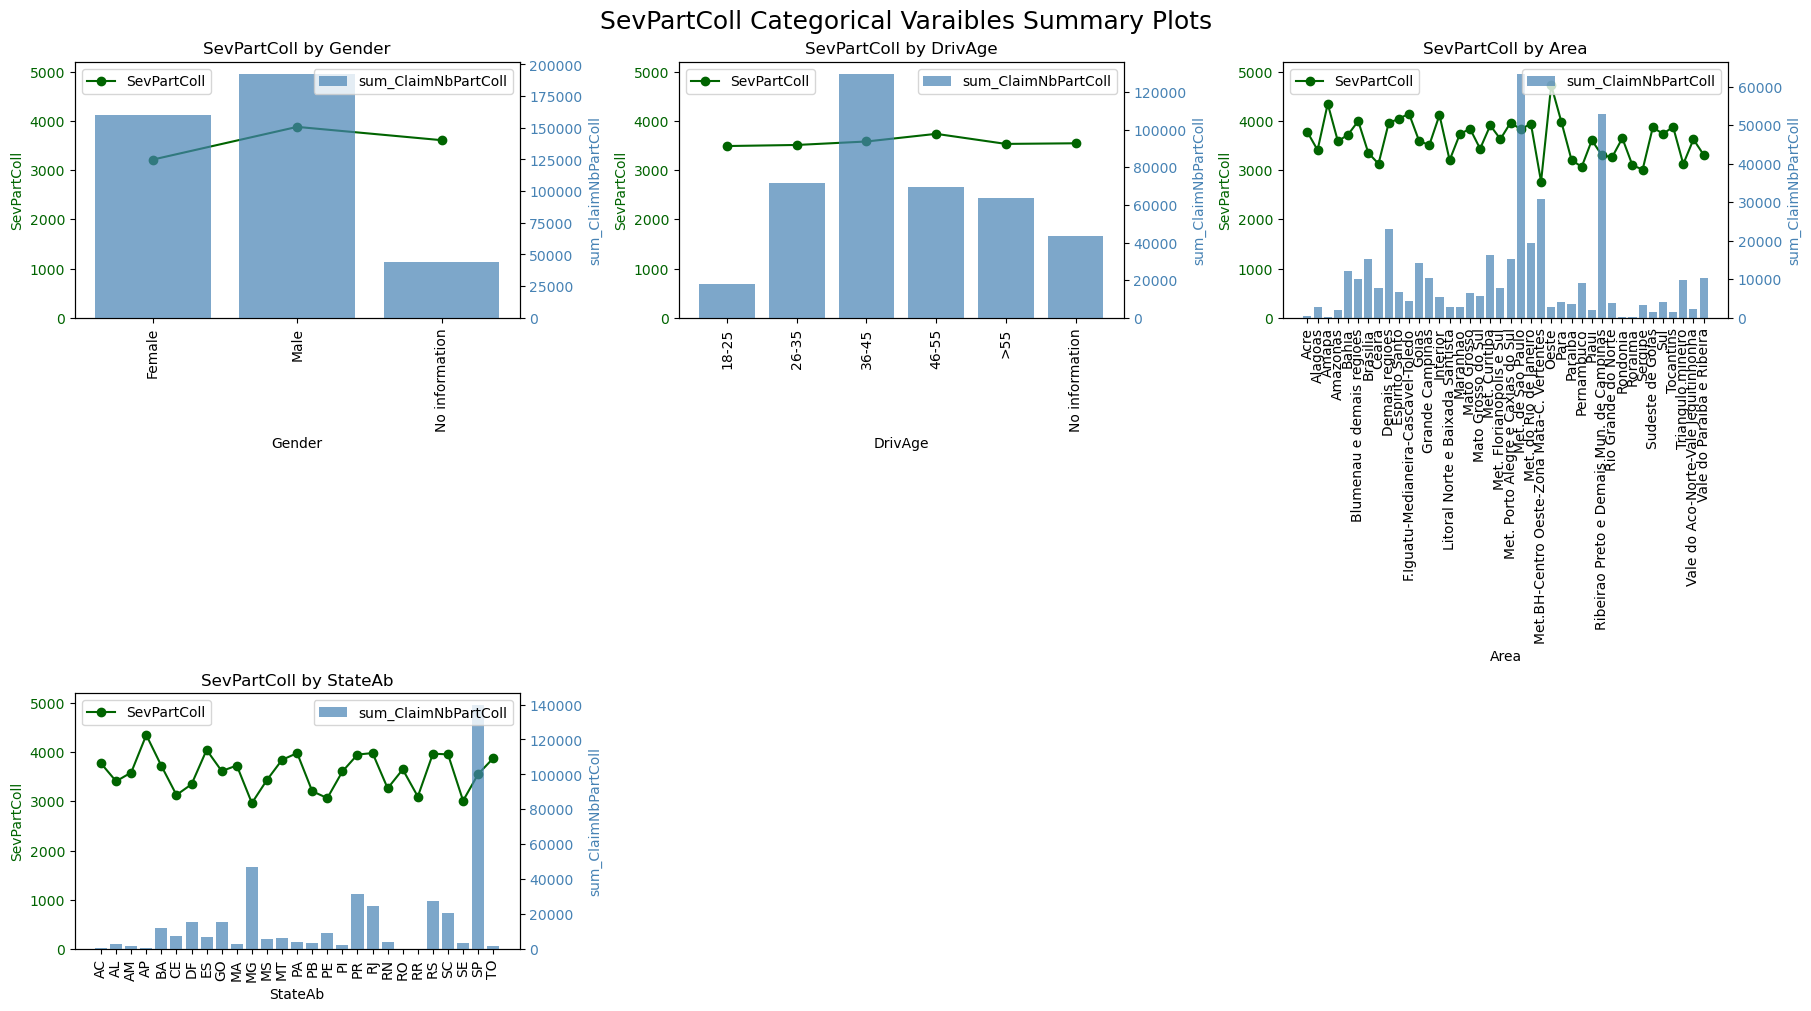

In [23]:
#ax = axes.flatten()[idx] #pomoc od chat
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) //  n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 5 * n_rows), constrained_layout=True)

axes = axes.flatten()

for idx, col in enumerate(cat_cols):
    _, _, grouped_pdf = model_fraction_by_variable_summary_cat(
        ax=axes[idx],
        dataframe=df,
        col=col,
        model_numerator=model_numerator,
        model_denominator=model_denominator,
        model_fraction=model_fraction,
        ylim_max_model_fraction=model_fraction_global_max*1.1,
        #ylim_max_denominator=model_denominator_global_max*1.1,

    )
    print(f"{col} Grouped DataFrame: ")
    grouped_pdf.to_csv(output_tables_dir / f"{model_fraction}_summary_{col}.csv", index=False)
    display(grouped_pdf)

for ax in axes[len(cat_cols):]:
    ax.axis("off")
fig.suptitle(f"{model_fraction} Categorical Varaibles Summary Plots", fontsize=18)

fig.savefig(output_plots_dir / f"{model_fraction}_summary_cat_variables.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()